<a href="https://colab.research.google.com/github/wjsks97/remotesensing-class/blob/main/PCA_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
fname_img = "PCA image2.tif"
! gdown --id 1b0vFJfMANeferyDgubcKPcQy0hK4KAe7

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1b0vFJfMANeferyDgubcKPcQy0hK4KAe7
To: /content/PCA image2.tif
100% 20.8M/20.8M [00:00<00:00, 29.8MB/s]


In [66]:
os.path.isfile(fname_img)

True

In [67]:
img = rasterio.open(fname_img)

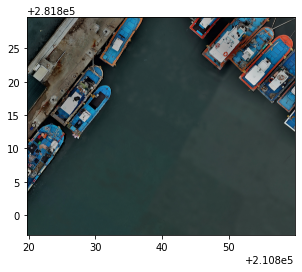

In [68]:
show(img)

In [69]:
type(img)
I = img.read()
I.shape

(3, 3832, 4721)

In [70]:
type(I)

numpy.ndarray

In [71]:
I = np.swapaxes(I, 0, 2)

In [72]:
I.shape

(4721, 3832, 3)

In [73]:
X = I.reshape((4721*3832, 3))
X.shape

(18090872, 3)

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [75]:
print(pca.components_)

[[ 0.57050075  0.57410241  0.58731194]
 [ 0.78294774 -0.16420539 -0.60002452]
 [ 0.24803573 -0.802149    0.54317149]]


In [76]:
x1 = pca.components_[:,0]
x2 = pca.components_[:,1]
np.dot(x1, x1)

0.9999999999999998

In [77]:
np.dot(x1, x2)

5.551115123125783e-17

In [78]:
print(pca.explained_variance_)

[2953.09362569  526.39956844   18.60644732]


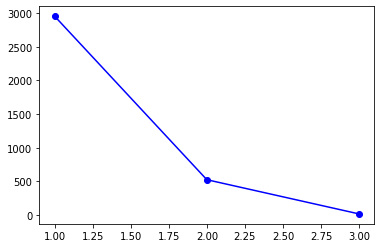

In [79]:
plt.plot(np.arange(3)+1, pca.explained_variance_, 'bo-')

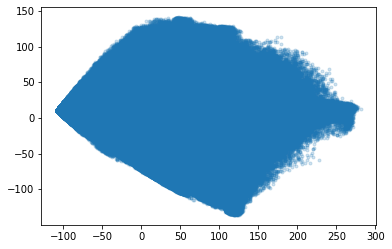

In [80]:
X_pca = pca.transform(X)
X_pca.shape
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', alpha=0.2)

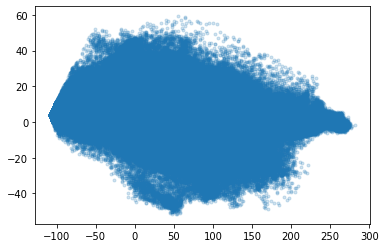

In [81]:
plt.scatter(X_pca[:, 0], X_pca[:, 2], marker='.', alpha=0.2)

In [85]:
I_pca = X_pca.reshape(4721,3832, 3)
I_pca = np.swapaxes(I_pca, 0, 1)

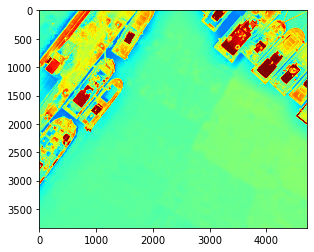

In [86]:
plt.imshow(I_pca[:,:,0], cmap='jet', vmin=-200, vmax=200)
plt.show()

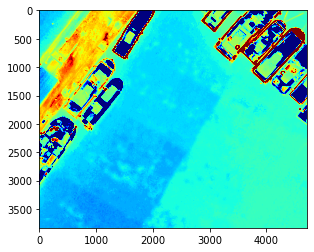

In [87]:
plt.imshow(I_pca[:,:,1], cmap='jet', vmin=-30, vmax=50)
plt.show()

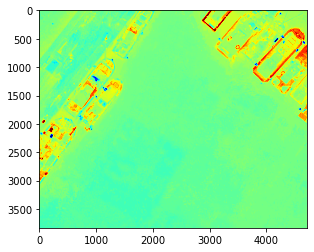

In [88]:
plt.imshow(I_pca[:,:,2], cmap='jet', vmin=-30, vmax=30)
plt.show()

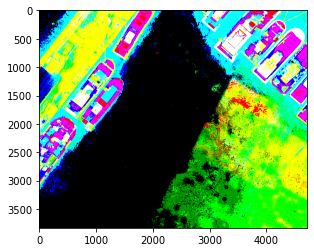

In [89]:
plt.imshow(I_pca)
plt.show()